The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections.

http://matplotlib.org/basemap/users/intro.html


Here we are translating lat/long to the equivalent on the Mercator Projection

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

In [2]:
airlines = pd.read_csv('./airlines.csv')
airports = pd.read_csv('./airports.csv')
routes = pd.read_csv('./routes.csv')

In [3]:
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [4]:
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


In [5]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


To begin, create a new basemap instance by calling the basemap constructor <br/>
http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap

In [6]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m

In [7]:
# Use basemap to convert the lat/long from airports to the lat/long in the desired projection
# arg1 = long, arg2 = lat
x, y = m(airports['longitude'].tolist(), airports['latitude'].tolist())

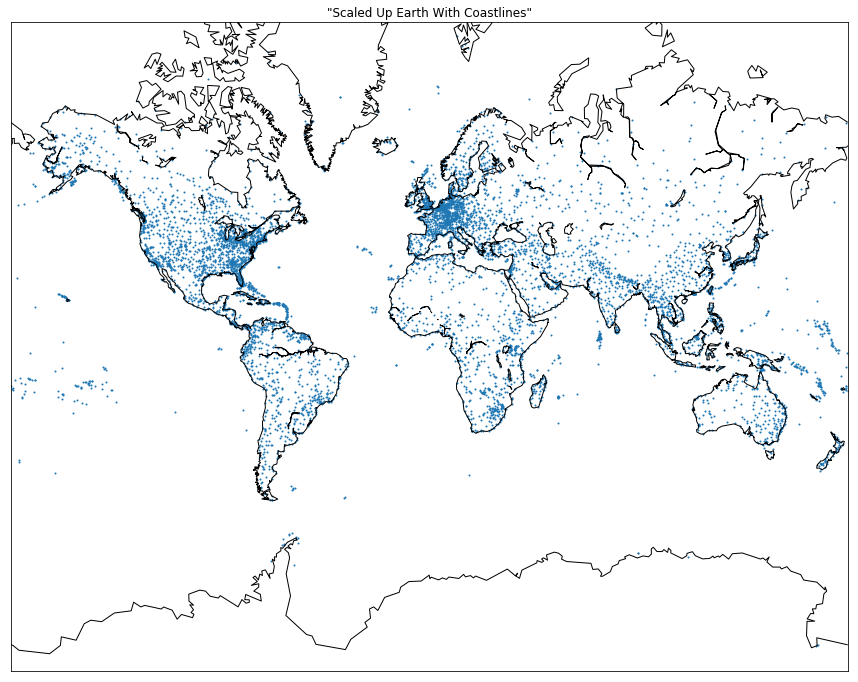

In [8]:
# now we can make a scatter plot using the x and coordinates.
# s parameter defines the marker size
fig, ax = plt.subplots(figsize=(15,20))
plt.title('"Scaled Up Earth With Coastlines"')
m.scatter(x,y,s=1)
m.drawcoastlines()
plt.show()

To better understand the flight routes, we can draw great circles to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

In [9]:
geo_routes = pd.read_csv('geo_routes.csv')
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


geo_routes.csv contains the latitude and longitude values corresponding to the source and destination airports for each route

In [10]:
geo_routes.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


## Visualizing all flights that originate from DFW

In [11]:
airports[airports['code'].str.contains('DFW') == True]

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
3571,3670,Dallas Fort Worth Intl,Dallas-Fort Worth,United States,DFW,KDFW,32.896828,-97.037997,607,-6.0,A,America/Chicago


In [12]:
# mercator long / lat of DFW airport
dfw_x, dfw_y = m(airports['longitude'][3571], airports['latitude'][3571])

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html

- Create a function create_great_circles()

Since basemap.drawgreatcirlce() cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain, check first that it is drawable

We use the basemap.drawgreatcircle() method to display a great circle between 2 points. The basemap.drawgreatcircle() method requires four parameters in the following order: <br/>
lon1 - longitude of the starting point. <br/>
lat1 - latitude of the starting point. <br/>
lon2 - longitude of the ending point. <br/>
lat2 - latitude of the ending point. <br/>

In [41]:
# filtered to flights that originate from DFW
dfw_origin = geo_routes[geo_routes['source'] == 'DFW']
dfw_origin.tail()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
63527,WN,DFW,RSW,738,-97.037997,-81.755167,32.896828,26.536167
64358,WS,DFW,YUL,738,-97.037997,-73.740833,32.896828,45.470556
64359,WS,DFW,YVR,738,-97.037997,-123.184444,32.896828,49.193889
64360,WS,DFW,YYC,73W,-97.037997,-114.020278,32.896828,51.113888
64361,WS,DFW,YYZ,319,-97.037997,-79.630556,32.896828,43.677223


In [49]:
def create_great_circle(dafr):
    for index, row in dafr.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        if abs(start_lat - end_lat) < 180:
            if abs(start_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

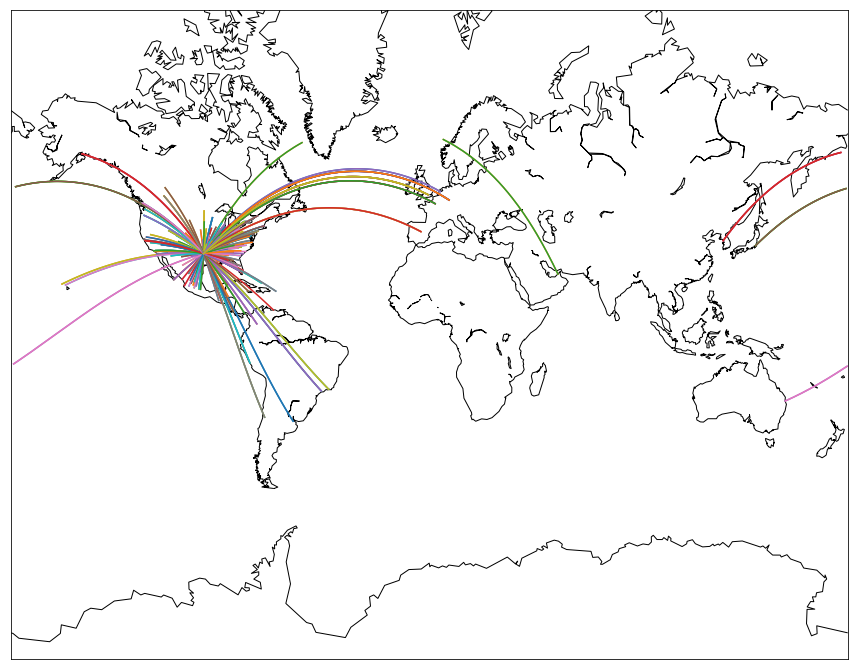

In [50]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
create_great_circle(dfw_origin)
plt.show()